# Definitions and Imports

In [21]:
import pandas as pd
from transformers import AutoTokenizer
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

In [4]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [5]:
root = "/scratch/tsoares/wikidumps/simplewiki-NS0-20230901/processed_data/"

# Load Data

In [7]:
files_links = glob(root + "good_links*")
files_pages = glob(root + "good_pages*")

In [10]:
dfs = []
for file in tqdm(files_links):
    dfs.append(pd.read_parquet(file))
df_links = pd.concat(dfs)
df_links = df_links.reset_index(drop=True)
df_links

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:08<00:00,  4.48s/it]


,target_title,target_section,source_title,target_ID,target_QID,source_ID,source_QID,source_version,link_ID,mention,...,sentence_end_index,source_page_length,link_section_depth,context,context_sentence_start_index,context_sentence_end_index,context_mention_start_index,context_mention_end_index,context_span_start_index,context_span_end_index
0,Leap_year,Lead,October_10,434,Q19828,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,None,leap years,...,40296,170177,0.0.0,October 10 is the 283rd day of the year (284th...,0.0,88.0,50.0,60.0,0.0,143.0
1,Gregorian_calendar,Lead,October_10,12159,Q12138,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,None,Gregorian calendar,...,40296,170177,0.0.0,October 10 is the 283rd day of the year (284th...,0.0,88.0,69.0,87.0,0.0,143.0
2,19,Lead,October_10,51220,Q23761,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,mwCQ,19,...,40937,170177,1.0.0,Events\n19 - Roman general Germanicus dies und...,7.0,106.0,7.0,9.0,7.0,177.0
3,Germanicus,Lead,October_10,58348,Q191039,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,mwCg,Germanicus,...,40937,170177,1.0.0,Events\n19 - Roman general Germanicus dies und...,7.0,106.0,26.0,36.0,7.0,177.0
4,Antioch,Lead,October_10,59366,Q200441,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,mwCw,Antioch,...,40937,170177,1.0.0,Events\n19 - Roman general Germanicus dies und...,7.0,106.0,76.0,83.0,7.0,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581139,German_reunification,Lead,October_3,32070,Q56039,9944,Q2931,https://simple.wikipedia.org/w/index.php?title...,mwBhQ,German reunification,...,205648,206125,4.0.0,"Observances\n Unity Day (Germany), marking the...",13.0,76.0,46.0,66.0,12.0,75.0
2581140,1990,Lead,October_3,8905,Q2064,9944,Q2931,https://simple.wikipedia.org/w/index.php?title...,mwBhU,1990,...,205648,206125,4.0.0,"Observances\n Unity Day (Germany), marking the...",13.0,76.0,70.0,74.0,12.0,75.0
2581141,South_Korea,Lead,October_3,5073,Q884,9944,Q2931,https://simple.wikipedia.org/w/index.php?title...,mwBhc,South Korea,...,205781,206125,4.0.0,"Observances\n Unity Day (Germany), marking the...",77.0,107.0,93.0,104.0,76.0,106.0
2581142,Iraq,Lead,October_3,26175,Q796,9944,Q2931,https://simple.wikipedia.org/w/index.php?title...,mwBhk,Iraq,...,205885,206125,4.0.0,"Observances\n Unity Day (Germany), marking the...",108.0,129.0,122.0,126.0,107.0,128.0


In [11]:
dfs = []
for file in tqdm(files_pages):
    dfs.append(pd.read_parquet(file))
df_pages = pd.concat(dfs)
df_pages = df_pages.reset_index(drop=True)
df_pages

100%|██████████| 2/2 [00:31<00:00, 15.84s/it]


,title,ID,version,HTML,page_length,language,lead_paragraph,QID
0,October_10,10067,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",170177.0,simple,October 10 is the 283rd day of the year in the...,Q2921
1,Organic_matter,73756,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",6789.0,simple,Organic matter is matter that has come from a ...,Q1783121
2,Pleiotropism,215655,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",8728.0,simple,Pleiotropism is a central term in developmenta...,Q1134884
3,Please_Mr._Postman,459503,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",46184.0,simple,"""Please Mr. Postman"" is the first single of Th...",Q778055
4,Plectrohyla_tecunumani,889674,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",26320.0,simple,The cave spikethumb frog is a frog that lives ...,Q748021
...,...,...,...,...,...,...,...,...
236080,The_False_Madonna,887841,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",5249.0,simple,The False Madonna is a 1931 American drama mov...,Q19363895
236081,The_Eyes_of_Annie_Jones,761141,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",7070.0,simple,The Eyes of Annie Jones is a 1964 British Amer...,Q7732939
236082,October_23,10069,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",152452.0,simple,October 23 is the 296th day of the year in the...,Q2958
236083,Octavio_Paz,67695,https://simple.wikipedia.org/w/index.php?title...,"<!DOCTYPE html>\n<html prefix=""dc: http://purl...",123499.0,simple,"Octavio Paz Lozano was a Mexican writer, poet,...",Q46739


# Statistics

## Lead Paragraph

In [14]:
df_pages['lead_paragraph_length'] = df_pages['lead_paragraph'].progress_apply(lambda x: len(tokenizer.tokenize(x)))

100%|██████████| 236085/236085 [01:08<00:00, 3466.45it/s]


What are some basic statistics of the mean number of tokens per lead paragraph?

In [15]:
df_pages['lead_paragraph_length'].describe()

count    236085.000000
mean         81.301802
std          81.096754
min           6.000000
25%          32.000000
50%          59.000000
75%         102.000000
max        8634.000000
Name: lead_paragraph_length, dtype: float64

In [16]:
df_pages['lead_paragraph_length'].median()

59.0

In [17]:
for quantile in [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
    print(quantile, df_pages['lead_paragraph_length'].quantile(quantile))

0.25 32.0
0.5 59.0
0.75 102.0
0.9 167.0
0.95 225.0
0.99 386.0


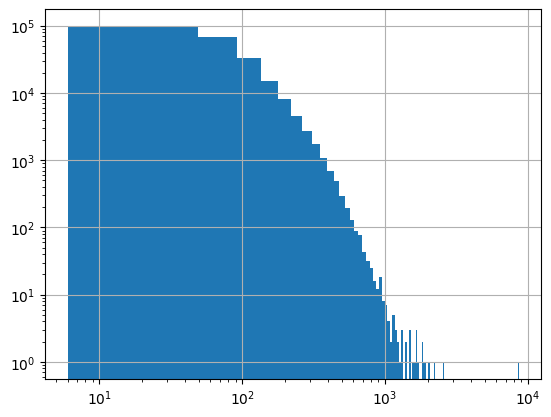

In [23]:
df_pages['lead_paragraph_length'].hist(bins=200)
# set log log scale
plt.yscale('log')
plt.xscale('log')

## Context

In [24]:
df_links['context_length'] = df_links['context'].progress_apply(lambda x: len(tokenizer.tokenize(x)))

100%|██████████| 2581144/2581144 [17:10<00:00, 2504.28it/s]


What are some basic statistics about the contexts?

In [25]:
df_links['context_length'].describe()

count    2.581144e+06
mean     1.166440e+02
std      9.529245e+01
min      1.000000e+00
25%      6.400000e+01
50%      1.040000e+02
75%      1.570000e+02
max      1.359300e+04
Name: context_length, dtype: float64

In [26]:
df_links['context_length'].median()

104.0

In [27]:
for quantile in [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
    print(quantile, df_links['context_length'].quantile(quantile))

0.25 64.0
0.5 104.0
0.75 157.0
0.9 212.0
0.95 247.0
0.99 324.0


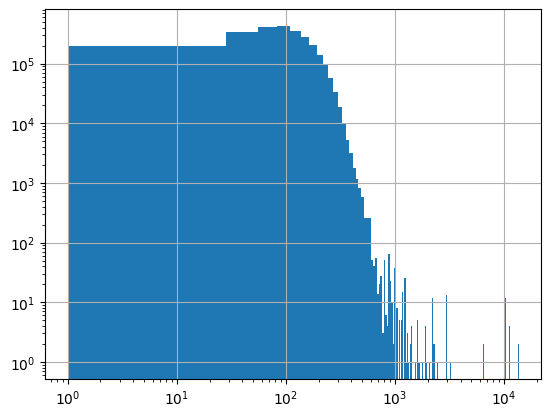

In [30]:
df_links['context_length'].hist(bins=500)
# set log log scale
plt.yscale('log')
plt.xscale('log')